
Fold 1/5

Split information:
Training: 12000 samples (80.0%)
Validation: 3000 samples (20.0%)
Epoch 1/100


Validation: 100%|██████████| 94/94 [00:35<00:00,  2.66it/s]



Epoch 1 Summary:
Train Loss: 0.1712 | Train Accuracy: 94.08%
Validation Loss: 0.0900 | Validation Accuracy: 97.20%
Epoch 2/100


Validation: 100%|██████████| 94/94 [00:35<00:00,  2.66it/s]



Epoch 2 Summary:
Train Loss: 0.0558 | Train Accuracy: 98.18%
Validation Loss: 0.0557 | Validation Accuracy: 98.27%
Epoch 3/100


Validation: 100%|██████████| 94/94 [00:35<00:00,  2.66it/s]



Epoch 3 Summary:
Train Loss: 0.0449 | Train Accuracy: 98.61%
Validation Loss: 0.0827 | Validation Accuracy: 97.50%
Epoch 4/100


Validation: 100%|██████████| 94/94 [00:35<00:00,  2.66it/s]



Epoch 4 Summary:
Train Loss: 0.0394 | Train Accuracy: 98.60%
Validation Loss: 0.0500 | Validation Accuracy: 98.33%
Epoch 5/100


Validation: 100%|██████████| 94/94 [00:35<00:00,  2.66it/s]



Epoch 5 Summary:
Train Loss: 0.0347 | Train Accuracy: 98.77%
Validation Loss: 0.0815 | Validation Accuracy: 97.77%
Epoch 6/100


Validation: 100%|██████████| 94/94 [00:35<00:00,  2.66it/s]



Epoch 6 Summary:
Train Loss: 0.0303 | Train Accuracy: 99.05%
Validation Loss: 0.0643 | Validation Accuracy: 97.83%
Epoch 7/100


Validation: 100%|██████████| 94/94 [00:35<00:00,  2.66it/s]



Epoch 7 Summary:
Train Loss: 0.0252 | Train Accuracy: 99.24%
Validation Loss: 0.0885 | Validation Accuracy: 97.27%
Epoch 8/100


Validation: 100%|██████████| 94/94 [00:35<00:00,  2.66it/s]



Epoch 8 Summary:
Train Loss: 0.0317 | Train Accuracy: 98.97%
Validation Loss: 0.0546 | Validation Accuracy: 98.33%
Epoch 9/100


Validation: 100%|██████████| 94/94 [00:35<00:00,  2.66it/s]



Epoch 9 Summary:
Train Loss: 0.0247 | Train Accuracy: 99.18%
Validation Loss: 0.0936 | Validation Accuracy: 96.83%
Early stopping at epoch 9


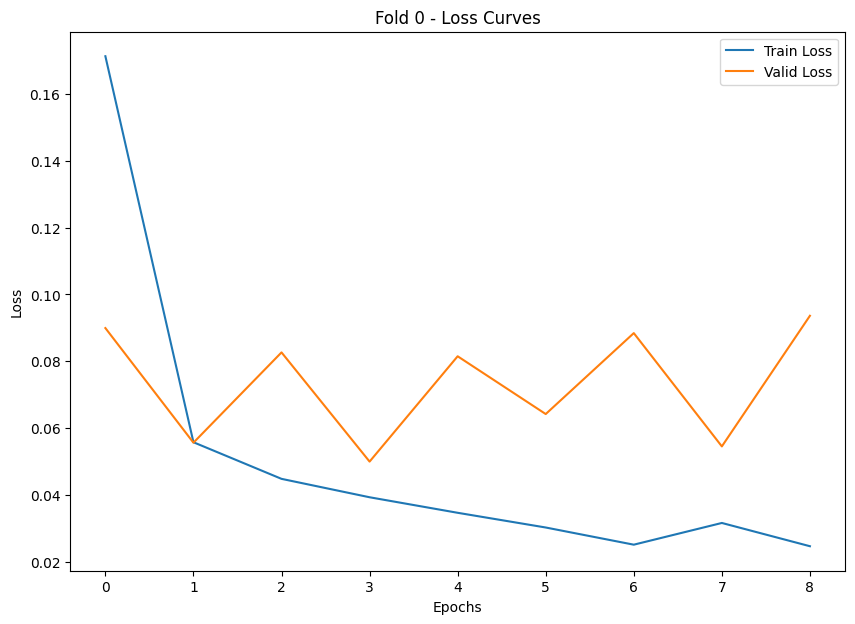

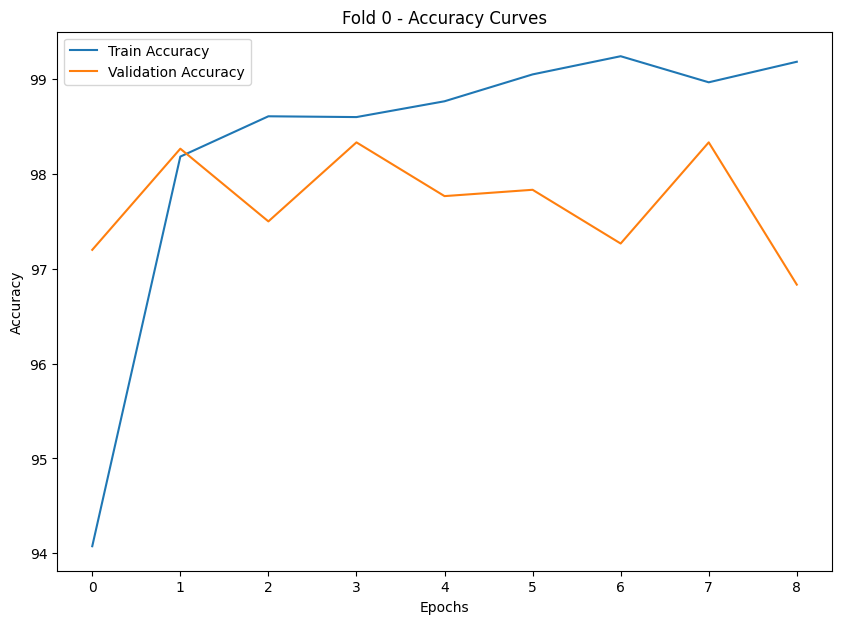

Evaluating on Test Set: 100%|██████████| 202/202 [01:15<00:00,  2.67it/s]



Test Accuracy for Fold 1: 95.23%


Generating Confusion Matrix: 100%|██████████| 202/202 [01:15<00:00,  2.68it/s]


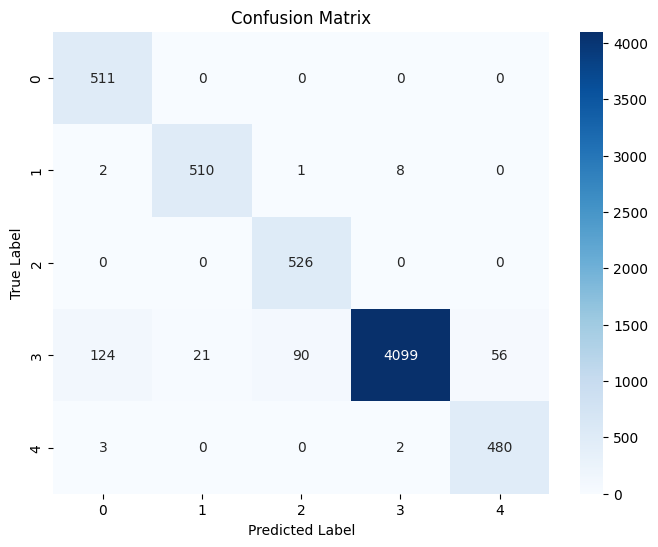


Fold 2/5

Split information:
Training: 12000 samples (80.0%)
Validation: 3000 samples (20.0%)
Epoch 1/100


Validation: 100%|██████████| 94/94 [00:35<00:00,  2.66it/s]



Epoch 1 Summary:
Train Loss: 0.0328 | Train Accuracy: 98.91%
Validation Loss: 0.0182 | Validation Accuracy: 99.40%
Epoch 2/100


Validation: 100%|██████████| 94/94 [00:35<00:00,  2.66it/s]



Epoch 2 Summary:
Train Loss: 0.0216 | Train Accuracy: 99.26%
Validation Loss: 0.0192 | Validation Accuracy: 99.47%
Epoch 3/100


Validation: 100%|██████████| 94/94 [00:35<00:00,  2.66it/s]



Epoch 3 Summary:
Train Loss: 0.0249 | Train Accuracy: 99.14%
Validation Loss: 0.0158 | Validation Accuracy: 99.50%
Epoch 4/100


Validation: 100%|██████████| 94/94 [00:35<00:00,  2.66it/s]



Epoch 4 Summary:
Train Loss: 0.0283 | Train Accuracy: 99.07%
Validation Loss: 0.0783 | Validation Accuracy: 97.27%
Epoch 5/100


Validation: 100%|██████████| 94/94 [00:35<00:00,  2.66it/s]



Epoch 5 Summary:
Train Loss: 0.0230 | Train Accuracy: 99.25%
Validation Loss: 0.0241 | Validation Accuracy: 99.13%
Epoch 6/100


Validation: 100%|██████████| 94/94 [00:35<00:00,  2.66it/s]



Epoch 6 Summary:
Train Loss: 0.0197 | Train Accuracy: 99.38%
Validation Loss: 0.0113 | Validation Accuracy: 99.67%
Epoch 7/100


Validation: 100%|██████████| 94/94 [00:35<00:00,  2.66it/s]



Epoch 7 Summary:
Train Loss: 0.0279 | Train Accuracy: 99.03%
Validation Loss: 0.0118 | Validation Accuracy: 99.57%
Epoch 8/100


Validation: 100%|██████████| 94/94 [00:35<00:00,  2.66it/s]



Epoch 8 Summary:
Train Loss: 0.0094 | Train Accuracy: 99.70%
Validation Loss: 0.0407 | Validation Accuracy: 98.77%
Epoch 9/100


Training:  71%|███████▏  | 268/375 [05:16<02:06,  1.18s/it, loss=0.0232, accuracy=99.30%]


KeyboardInterrupt: 

In [6]:
import os
import torch
import torchvision
from torch import nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split, Subset
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from collections import Counter
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
from torchinfo import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def set_seeds(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

def create_dataloaders(train_dir, test_dir, transform, batch_size=32, num_workers=4):
    train_dataset = datasets.ImageFolder(train_dir, transform=transform)
    test_dataset = datasets.ImageFolder(test_dir, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, 
                           num_workers=num_workers, pin_memory=True)
    return train_dataset, test_loader, train_dataset.classes

def plot_loss_curves(train_losses, valid_losses, fold):
    plt.figure(figsize=(10, 7))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(valid_losses, label="Valid Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Fold {fold} - Loss Curves")
    plt.show()

def plot_accuracy_curves(train_accuracies, valid_accuracies, fold):
    plt.figure(figsize=(10, 7))
    plt.plot(train_accuracies, label="Train Accuracy")
    plt.plot(valid_accuracies, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title(f"Fold {fold} - Accuracy Curves")
    plt.show()

def pred_and_plot_image(model, image_path, class_names, transform, device):
    model.eval()
    image = Image.open(image_path).convert("RGB")
    transformed_image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(transformed_image)
        _, predicted_class = torch.max(outputs, 1)
        predicted_label = class_names[predicted_class]

    plt.imshow(image)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()

class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        self.patience = patience
        self.delta = delta
        self.best_loss = float('inf')
        self.counter = 0
        self.stop_training = False

    def __call__(self, valid_loss):
        if valid_loss < self.best_loss - self.delta:
            self.best_loss = valid_loss
            self.counter = 0
        else:
            self.counter += 1

        if self.counter >= self.patience:
            self.stop_training = True
        return self.stop_training

def train_model_with_early_stopping(model, train_dataloader, val_dataloader, optimizer, loss_fn, epochs, device, patience=5):
    train_losses, valid_losses = [], []
    train_accuracies, valid_accuracies = [], []
    early_stopping = EarlyStopping(patience=patience)

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        model.train()
        epoch_train_loss = 0.0
        running_train_loss = 0.0
        running_correct = 0
        running_total = 0

        pbar = tqdm(train_dataloader)
        for i, (images, labels) in enumerate(pbar):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()
            epoch_train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            running_total += labels.size(0)
            running_correct += (predicted == labels).sum().item()

            current_loss = running_train_loss / (i + 1)
            current_accuracy = 100 * running_correct / running_total

            pbar.set_description(f"Training")
            pbar.set_postfix({
                'loss': f'{current_loss:.4f}',
                'accuracy': f'{current_accuracy:.2f}%'
            })

        epoch_train_loss = epoch_train_loss / len(train_dataloader)
        train_accuracy = 100 * running_correct / running_total
        
        train_losses.append(epoch_train_loss)
        train_accuracies.append(train_accuracy)

        model.eval()
        valid_loss = 0.0
        valid_correct = 0
        valid_total = 0

        with torch.no_grad():
            for images, labels in tqdm(val_dataloader, desc="Validation"):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = loss_fn(outputs, labels)
                valid_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                valid_total += labels.size(0)
                valid_correct += (predicted == labels).sum().item()

        valid_loss = valid_loss / len(val_dataloader)
        valid_accuracy = 100 * valid_correct / valid_total

        valid_losses.append(valid_loss)
        valid_accuracies.append(valid_accuracy)

        print(f"\nEpoch {epoch+1} Summary:")
        print(f"Train Loss: {epoch_train_loss:.4f} | Train Accuracy: {train_accuracy:.2f}%")
        print(f"Validation Loss: {valid_loss:.4f} | Validation Accuracy: {valid_accuracy:.2f}%")

        if early_stopping(valid_loss):
            print(f"Early stopping at epoch {epoch+1}")
            break

    return train_losses, valid_losses, train_accuracies, valid_accuracies

def plot_confusion_matrix(model, dataloader, device, num_classes):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="Generating Confusion Matrix"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds, labels=list(range(num_classes)))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def k_fold_cross_validation(model, train_dataset, test_loader, optimizer, loss_fn, epochs, device, k=5):
    dataset_size = len(train_dataset)
    fold_size = dataset_size // k
    
    all_indices = list(range(dataset_size))
    torch.manual_seed(42)
    shuffled_indices = torch.randperm(dataset_size).tolist()
    
    fold_train_losses = []
    fold_valid_losses = []
    fold_train_accuracies = []
    fold_valid_accuracies = []
    all_fold_test_accuracies = []
    
    for fold in range(k):
        print(f"\nFold {fold+1}/{k}")
        
        val_start = fold * fold_size
        val_end = (fold + 1) * fold_size
        val_indices = shuffled_indices[val_start:val_end]
        train_indices = shuffled_indices[:val_start] + shuffled_indices[val_end:]
        
        print("\nSplit information:")
        print(f"Training: {len(train_indices)} samples ({len(train_indices)/dataset_size*100:.1f}%)")
        print(f"Validation: {len(val_indices)} samples ({len(val_indices)/dataset_size*100:.1f}%)")
        
        train_subset = Subset(train_dataset, train_indices)
        val_subset = Subset(train_dataset, val_indices)

        train_dataloader = DataLoader(train_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
        val_dataloader = DataLoader(val_subset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

        train_losses, valid_losses, train_accuracies, valid_accuracies = train_model_with_early_stopping(
            model, train_dataloader, val_dataloader, optimizer, loss_fn, epochs, device)

        plot_loss_curves(train_losses, valid_losses, fold)
        plot_accuracy_curves(train_accuracies, valid_accuracies, fold)

        fold_train_losses.append(train_losses)
        fold_valid_losses.append(valid_losses)
        fold_train_accuracies.append(train_accuracies)
        fold_valid_accuracies.append(valid_accuracies)

        model.eval()
        test_correct = 0
        test_total = 0
        with torch.no_grad():
            for images, labels in tqdm(test_loader, desc="Evaluating on Test Set"):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()

        test_accuracy = 100 * test_correct / test_total
        print(f"\nTest Accuracy for Fold {fold+1}: {test_accuracy:.2f}%")
        all_fold_test_accuracies.append(test_accuracy)

        plot_confusion_matrix(model, test_loader, device, len(train_dataset.classes))

    print("\nFinal Test Results for All Folds:")
    for fold, acc in enumerate(all_fold_test_accuracies, 1):
        print(f"Fold {fold}: {acc:.2f}%")
    print(f"Average Test Accuracy: {sum(all_fold_test_accuracies)/len(all_fold_test_accuracies):.2f}%")

    return fold_train_losses, fold_valid_losses, fold_train_accuracies, fold_valid_accuracies, all_fold_test_accuracies

# Model initialization and training setup
model = torchvision.models.vit_b_16(pretrained=True)
num_classes = 5
last_layer = model.heads[-1]
model.heads[-1] = nn.Linear(last_layer.in_features, num_classes)
model = model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

train_dir = '/kaggle/input/aider-modified'
test_dir = '/kaggle/input/test-dataset/AIDER'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset, test_loader, class_names = create_dataloaders(train_dir, test_dir, transform)
results = k_fold_cross_validation(model, train_dataset, test_loader, optimizer, loss_fn, epochs=100, device=device)